In [1]:
from cbir import CBIR
import cv2
import os
import networkx as nx
import cProfile

In [2]:
def profile(func, *args, **kwargs):
    pr = cProfile.Profile()
    pr.enable()
    func(*args, **kwargs)
    pr.disable()
    pr.print_stats(sort="tottime")
    return pr

In [3]:
cbir = CBIR("data/jpg", 2, 2, sift_implementation="ezsift")

In [4]:
cbir.fit()

Extracting features 1491/1491 from image 149902.jpg - ETA: 0.000000s
1239134 features extracted


In [5]:
cbir.index(parallel=False)


Generating index
Indexing image 1492/1491:  149902.jpg - ETA: 0.000000ss
Calculating weights
Inverted index generated


In [6]:
cbir.encode("104002", return_graph=False)

array([0.4472136, 0.4472136, 0.4472136, 0.4472136, 0.4472136, 0.       ,
       0.       ])

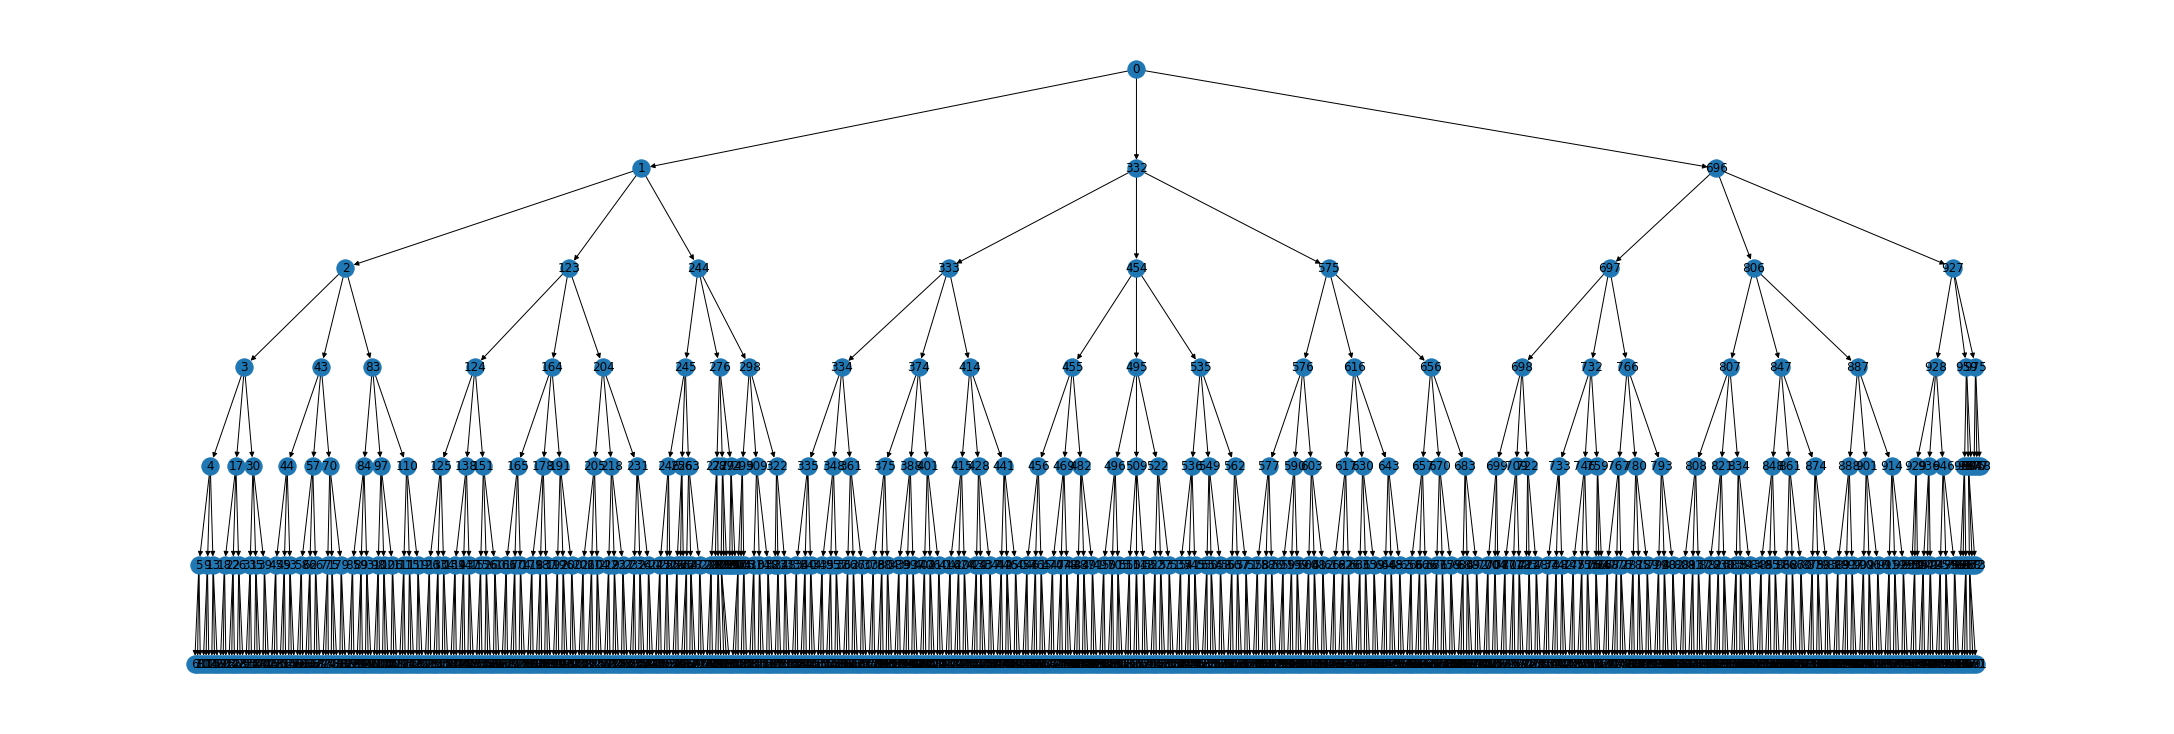

In [7]:
cbir.draw()

In [33]:
cbir.index(parallel=False)


Generating index
Indexing image 1491/1491:  149902.jpg - ETA: 0.000000ss
Calculating weights
Inverted index generated


In [36]:
cbir.encode("104002", return_graph=False)

array([0.29811345, 0.29811345, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [34]:
cbir.graph.nodes(data="104002", default=0)

NodeDataView({0: 2619, 1: 2619, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 13

In [4]:
score = cbir.score(r"C:\Users\epignatel\Documents\repos\sberbank\data\jpg\100000.jpg", r"C:\Users\epignatel\Documents\repos\sberbank\data\jpg\100101.jpg")
score

0.5601952533150045

In [6]:
query = r"C:\Users\epignatel\Documents\repos\sberbank\data\jpg\127000.jpg"
scores = cbir.retrieve(query)

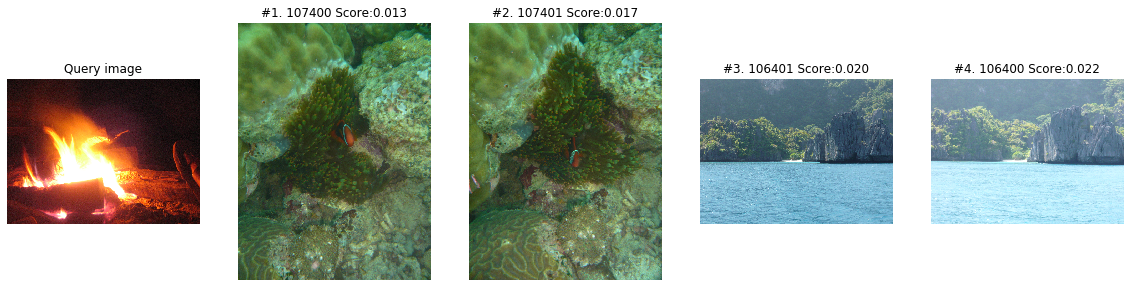

In [7]:
cbir.show_results(query, scores)

In [13]:
nx.write_gpickle(cbir.graph, "data/index.pickle")

         58452892 function calls (58384432 primitive calls) in 66.252 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 56663964   40.245    0.000   40.245    0.000 reportviews.py:259(<genexpr>)
    74423   23.356    0.000   63.711    0.001 {built-in method numpy.array}
    68458    0.516    0.000    1.276    0.000 linalg.py:2316(norm)
     2619    0.335    0.000    1.738    0.001 cbir.py:144(propagate_feature)
138411/69951    0.292    0.000    1.435    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     2982    0.157    0.000   63.898    0.021 cbir.py:164(encode)
        1    0.153    0.153    2.079    2.079 cbir.py:121(propagate)
   142152    0.139    0.000    0.184    0.000 graph.py:666(nodes)
    68458    0.084    0.000    1.478    0.000 <__array_function__ internals>:2(norm)
     1491    0.074    0.000   64.094    0.043 cbir.py:179(score)
    68458    0.070    0.000    0.274    0.000 <__ar

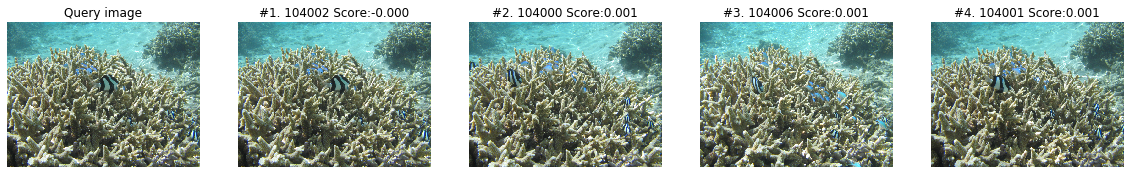

In [7]:
pr = cProfile.Profile()
pr.enable()
query = r"C:\Users\epignatel\Documents\repos\sberbank\data\jpg\104002.jpg"
scores = cbir.retrieve(query)
pr.disable()
pr.print_stats(sort="tottime")
cbir.show_results(query, scores)